# Machine Learning Models for Predicting Dropout Categories in New York State School Districts


- Volkan Uzundag

# Introduction

This project delves into the effectiveness of gradient descent-based models compared to other machine learning models. To achieve this, we employ a host of models, including a Decision Tree, a Random Forest, a Gradient Boosting Classifier, a Stochastic Gradient Descent Classifier, and an XGBoost Classifier. These models are employed to predict a newly created categorical response variable that represents the likelihood of a student dropout in New York State school districts.


We introduce a novel response variable derived from the dataset's 'dropout_pct' attribute. This variable categorizes the likelihood of student dropout into three categories: 'low', 'medium', and 'high'.


- 'Low': indicates a dropout percentage less than half of the median percentage of all dropouts across all school districts and student subgroupings.

- 'Medium': indicates a dropout percentage that lies between 0.5 and 1.5 times the median percentage of all dropouts.

- 'High': indicates a dropout percentage exceeding 1.5 times the median percentage of all dropouts.



These categories provide a measure of the dropout likelihood within a given school district or student subgrouping. The aim of our machine learning models is to predict which of these three categories is most likely to apply to a given observation.

The project follows a structured approach, starting with data loading and cleaning, followed by exploratory data analysis to understand variable distributions and relationships. Then, we preprocess the data and engineer features, and finally, we build and evaluate the machine learning models. Through this process, we hope to gain valuable insights into the performance of different machine learning models in predicting student dropout categories.

The dataset contains over 73,000 observations, each pertaining to a particular NY State school district and associated subgroupings/categorizations of high school students. The feature set includes a variety of categorical and numerical attributes:

- report_school_year: Indicates the school year for which high school graduation info is being reported.
- aggregation_index: Numeric code identifying the manner in which high school graduation data has been aggregated.
- aggregation_type: Text description of how high school graduation data has been aggregated.
- nrc_code: Numeric code identifying "needs / resource capacity", which is an indicator of the type of school district.
- nrc_desc: Text description of the type of school district.
- county_code: Numeric code for county name.
- county_name: Full name of applicable NY State county.
- nyc_ind: Indicates whether or not the school district resides within the borders of NYC.
- membership_desc: Indicates the school year in which students first enrolled in High School.
- subgroup_code: Numeric code identifying student subgrouping.
- subgroup_name: Text description of student subgrouping.
- enroll_cnt: How many students of the indicated subgrouping were enrolled during the given school year.
- grad_cnt: How many enrolled students of the indicated subgrouping graduated at the end of the given school year.
- grad_pct: What percentage of enrolled students of the indicated subgrouping graduated at the end for the given school year.
- reg_cnt: How many enrolled students of the indicated subgrouping were awarded a "Regents" diploma.
- reg_pct: What percentage of enrolled students of the indicated subgrouping were awarded a "Regents" diploma.
- dropout_cnt: How many enrolled students of the indicated subgrouping discontinued their high school enrollment during the school year.
- dropout_pct: What percentage of enrolled students of the indicated subgrouping discontinued their high school enrollment during the school year.


We will begin by loading and cleaning the data, which includes dealing with missing values and converting data types as necessary. We will then perform exploratory data analysis to understand the distributions of our variables and identify any potential outliers and relationship between variables. Next, we will prepare our data for modeling.
Finally, we will regression models to our data and evaluate its performance.

In [1]:
# import the relevant librarires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# load the dataset
url = 'https://raw.githubusercontent.com/Vlkn-da/DAV-6150/main/M11_Data.csv'

dataset = pd.read_csv(url)

# display the data
dataset.head()

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,grad_pct,reg_cnt,reg_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,1,All Students,658,464,71%,310,47%,148,22%
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,2,Female,324,246,76%,169,52%,65,20%
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,3,Male,334,218,65%,141,42%,83,25%
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,4,American Indian/Alaska Native,-,-,-,-,-,-,-
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,5,Black,367,248,68%,183,50%,91,25%


In [2]:
# copy the dataset to keep the original
data = dataset.copy()

In [3]:
# shape of the data
data.shape

(73152, 19)

There are 19 variables and approximately 73K observations. We might need to reduce the number of dimensions, since there is plenty of them. We will decide it after exploring the relationship between variables.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   report_school_year  73152 non-null  object
 1   aggregation_index   73152 non-null  int64 
 2   aggregation_type    73152 non-null  object
 3   aggregation_name    73152 non-null  object
 4   nrc_code            73152 non-null  int64 
 5   nrc_desc            73152 non-null  object
 6   county_code         73152 non-null  int64 
 7   county_name         73152 non-null  object
 8   nyc_ind             73152 non-null  int64 
 9   membership_desc     73152 non-null  object
 10  subgroup_code       73152 non-null  int64 
 11  subgroup_name       73152 non-null  object
 12  enroll_cnt          73152 non-null  object
 13  grad_cnt            73152 non-null  object
 14  grad_pct            73152 non-null  object
 15  reg_cnt             73152 non-null  object
 16  reg_pct             73

In [4]:
# check if there is any row filled with '?'
data.eq('?').sum().sum()

0

In [5]:
# check for missing values
data.isnull().sum()

report_school_year    0
aggregation_index     0
aggregation_type      0
aggregation_name      0
nrc_code              0
nrc_desc              0
county_code           0
county_name           0
nyc_ind               0
membership_desc       0
subgroup_code         0
subgroup_name         0
enroll_cnt            0
grad_cnt              0
grad_pct              0
reg_cnt               0
reg_pct               0
dropout_cnt           0
dropout_pct           0
dtype: int64

There is not any missing values and values filled with '?' in the dataset.

In [6]:
# check for duplicate data
data[data.duplicated()].sum()

report_school_year    0.0
aggregation_index     0.0
aggregation_type      0.0
aggregation_name      0.0
nrc_code              0.0
nrc_desc              0.0
county_code           0.0
county_name           0.0
nyc_ind               0.0
membership_desc       0.0
subgroup_code         0.0
subgroup_name         0.0
enroll_cnt            0.0
grad_cnt              0.0
grad_pct              0.0
reg_cnt               0.0
reg_pct               0.0
dropout_cnt           0.0
dropout_pct           0.0
dtype: float64

There is not any duplicate value as well.

In [8]:
# summary statistics for numerical variables
data.describe()

,aggregation_index,nrc_code,county_code,nyc_ind,subgroup_code
count,73152.0,73152.000000,73152.000000,73152.000000,73152.000000
mean,3.0,4.588583,36.251859,0.055255,12.000930
std,0.0,1.203507,20.588044,0.228479,7.213138
min,3.0,1.000000,1.000000,0.000000,1.000000
25%,3.0,4.000000,17.000000,0.000000,6.000000
50%,3.0,5.000000,40.000000,0.000000,11.000000
75%,3.0,5.000000,57.000000,0.000000,18.000000
max,3.0,6.000000,68.000000,1.000000,25.000000


We do not have the summary statistics of most of the numeric data. We will check the data types again.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   report_school_year  73152 non-null  object
 1   aggregation_index   73152 non-null  int64 
 2   aggregation_type    73152 non-null  object
 3   aggregation_name    73152 non-null  object
 4   nrc_code            73152 non-null  int64 
 5   nrc_desc            73152 non-null  object
 6   county_code         73152 non-null  int64 
 7   county_name         73152 non-null  object
 8   nyc_ind             73152 non-null  int64 
 9   membership_desc     73152 non-null  object
 10  subgroup_code       73152 non-null  int64 
 11  subgroup_name       73152 non-null  object
 12  enroll_cnt          73152 non-null  object
 13  grad_cnt            73152 non-null  object
 14  grad_pct            73152 non-null  object
 15  reg_cnt             73152 non-null  object
 16  reg_pct             73

For variables storing including description, percentage and count data, object data type is used. Object data types might not perform well in mathematical operations, thus, we will convert those storing counts to integer and those storing percentage to float types. 

In [10]:
data.describe(include='all')

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,grad_pct,reg_cnt,reg_pct,dropout_cnt,dropout_pct
count,73152,73152.0,73152,73152,73152.000000,73152,73152.000000,73152,73152.000000,73152,73152.000000,73152,73152,73152,73152,73152,73152,73152,73152
unique,1,NaN,1,680,NaN,6,NaN,62,NaN,6,NaN,24,1464,1715,101,1290,102,445,81
top,2018-19,NaN,District,KINGSTON CITY SCHOOL DISTRICT,NaN,Average Needs,NaN,SUFFOLK,NaN,2015 Total Cohort - 4 Year Outcome,NaN,All Students,-,-,-,-,-,-,-
freq,73152,NaN,73152,138,NaN,35322,NaN,6526,NaN,12299,NaN,4074,33478,33478,33478,33478,33478,33478,33478
mean,NaN,3.0,NaN,NaN,4.588583,NaN,36.251859,NaN,0.055255,NaN,12.000930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.0,NaN,NaN,1.203507,NaN,20.588044,NaN,0.228479,NaN,7.213138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,3.0,NaN,NaN,1.000000,NaN,1.000000,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,3.0,NaN,NaN,4.000000,NaN,17.000000,NaN,0.000000,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.0,NaN,NaN,5.000000,NaN,40.000000,NaN,0.000000,NaN,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.0,NaN,NaN,5.000000,NaN,57.000000,NaN,0.000000,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Though there did not appear any missing data previously, there are rows consisting of '-'s, which should be assigned as missing data. After that, we will transform the data types.

In [11]:
# replace '-' with np.nan
data = data.replace('-', np.nan)

#check
data.head()

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,grad_pct,reg_cnt,reg_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,1,All Students,658,464,71%,310,47%,148,22%
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,2,Female,324,246,76%,169,52%,65,20%
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,3,Male,334,218,65%,141,42%,83,25%
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,4,American Indian/Alaska Native,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,5,Black,367,248,68%,183,50%,91,25%


In [12]:
# Converting columns ending with '_cnt' to integer and '_pct' to float
for col in data.columns:
    if col.endswith('_cnt'):
        data[col] = pd.to_numeric(data[col], errors='coerce').astype('Int64')
    elif col.endswith('_pct'):
        data[col] = data[col].str.rstrip('%').astype('float')
data.dtypes

report_school_year     object
aggregation_index       int64
aggregation_type       object
aggregation_name       object
nrc_code                int64
nrc_desc               object
county_code             int64
county_name            object
nyc_ind                 int64
membership_desc        object
subgroup_code           int64
subgroup_name          object
enroll_cnt              Int64
grad_cnt                Int64
grad_pct              float64
reg_cnt                 Int64
reg_pct               float64
dropout_cnt             Int64
dropout_pct           float64
dtype: object

In [13]:
data.describe()

,aggregation_index,nrc_code,county_code,nyc_ind,subgroup_code,enroll_cnt,grad_cnt,grad_pct,reg_cnt,reg_pct,dropout_cnt,dropout_pct
count,73152.0,73152.000000,73152.000000,73152.000000,73152.000000,39674.0,39674.0,39674.000000,39674.0,39674.000000,39674.0,39674.000000
mean,3.0,4.588583,36.251859,0.055255,12.000930,192.120079,161.178354,84.406614,86.804708,43.371125,16.239225,7.963049
std,0.0,1.203507,20.588044,0.228479,7.213138,439.972474,361.294773,15.679500,225.795826,17.124891,50.129834,9.658698
min,3.0,1.000000,1.000000,0.000000,1.000000,5.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
25%,3.0,4.000000,17.000000,0.000000,6.000000,25.0,20.0,79.000000,10.0,33.000000,1.0,1.000000
50%,3.0,5.000000,40.000000,0.000000,11.000000,66.0,57.0,89.000000,27.0,43.000000,3.0,5.000000
75%,3.0,5.000000,57.000000,0.000000,18.000000,179.0,156.0,95.000000,69.0,53.000000,9.0,11.000000
max,3.0,6.000000,68.000000,1.000000,25.000000,9176.0,7540.0,100.000000,4752.0,100.000000,1091.0,100.000000


- There is a huge difference between the number of observations for categorical and numerical variables, 73152 and 39674 respectively. We will examine possible causes of this situation.
- There seems to be some redundant columns that we should remove. We will check the columns we think are redundant first for whether they contain any useful information.

In [14]:
data['report_school_year'].unique()

array(['2018-19'], dtype=object)

In [15]:
data['aggregation_type'].unique()

array(['District'], dtype=object)

In [16]:
data['aggregation_index'].unique()

array([3], dtype=int64)

There are several columns that are useless for our analysis. We will remove them from the dataframe in order to have good computing performance. The following columns will be removed:

  - report_school_year: it consists of only single value, 2018-2019. We do not lose any data after removing.
  - aggregation_index: it only consist of only single value, 3. Index value is meaningles for our purpose.
  - aggregation_type: it only consist of only single value, District. There is no variation in that type.
  - nrc_desc, county_name, membership_desc, subgroup_name: Since the dataset includes the code information for those variable, we do not need to keep the same information twice.

In [17]:
# list of columns to drop
columns_to_drop = ['report_school_year', 'aggregation_index', 'aggregation_type',
                   'nrc_desc', 'county_name', 'subgroup_name']

# drop the columns
data = data.drop(columns_to_drop, axis=1)

# check
data.columns

Index(['aggregation_name', 'nrc_code', 'county_code', 'nyc_ind',
       'membership_desc', 'subgroup_code', 'enroll_cnt', 'grad_cnt',
       'grad_pct', 'reg_cnt', 'reg_pct', 'dropout_cnt', 'dropout_pct'],
      dtype='object')

In [18]:
# check the new dataframe
data.head()

,aggregation_name,nrc_code,county_code,nyc_ind,membership_desc,subgroup_code,enroll_cnt,grad_cnt,grad_pct,reg_cnt,reg_pct,dropout_cnt,dropout_pct
0,ALBANY CITY SCHOOL DISTRICT,3,1,0,2013 Total Cohort - 6 Year Outcome,1,658,464,71.0,310,47.0,148,22.0
1,ALBANY CITY SCHOOL DISTRICT,3,1,0,2013 Total Cohort - 6 Year Outcome,2,324,246,76.0,169,52.0,65,20.0
2,ALBANY CITY SCHOOL DISTRICT,3,1,0,2013 Total Cohort - 6 Year Outcome,3,334,218,65.0,141,42.0,83,25.0
3,ALBANY CITY SCHOOL DISTRICT,3,1,0,2013 Total Cohort - 6 Year Outcome,4,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN
4,ALBANY CITY SCHOOL DISTRICT,3,1,0,2013 Total Cohort - 6 Year Outcome,5,367,248,68.0,183,50.0,91,25.0


As we had mentioned earlier, categorical and numerical variables have different number of observations. There are many rows without any data. Those are the rows that were filled with '-'s. We think that this missingness in data probably stems from data extraction from database. To confirm that we will have a look at the percentages of the missing data per column.

In [19]:
# Calculate the percentage of missing values for each variable
missing_values = data.isnull().mean() * 100

# print missing values percentages
missing_values

aggregation_name     0.000000
nrc_code             0.000000
county_code          0.000000
nyc_ind              0.000000
membership_desc      0.000000
subgroup_code        0.000000
enroll_cnt          45.764983
grad_cnt            45.764983
grad_pct            45.764983
reg_cnt             45.764983
reg_pct             45.764983
dropout_cnt         45.764983
dropout_pct         45.764983
dtype: float64

In [20]:
# check for any pattern in the missing rows
data.head(30)

,aggregation_name,nrc_code,county_code,nyc_ind,membership_desc,subgroup_code,enroll_cnt,grad_cnt,grad_pct,reg_cnt,reg_pct,dropout_cnt,dropout_pct
0,ALBANY CITY SCHOOL DISTRICT,3,1,0,2013 Total Cohort - 6 Year Outcome,1,658,464,71.0,310,47.0,148,22.0
1,ALBANY CITY SCHOOL DISTRICT,3,1,0,2013 Total Cohort - 6 Year Outcome,2,324,246,76.0,169,52.0,65,20.0
2,ALBANY CITY SCHOOL DISTRICT,3,1,0,2013 Total Cohort - 6 Year Outcome,3,334,218,65.0,141,42.0,83,25.0
3,ALBANY CITY SCHOOL DISTRICT,3,1,0,2013 Total Cohort - 6 Year Outcome,4,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN
4,ALBANY CITY SCHOOL DISTRICT,3,1,0,2013 Total Cohort - 6 Year Outcome,5,367,248,68.0,183,50.0,91,25.0
5,ALBANY CITY SCHOOL DISTRICT,3,1,0,2013 Total Cohort - 6 Year Outcome,6,98,58,59.0,40,41.0,28,29.0
6,ALBANY CITY SCHOOL DISTRICT,3,1,0,2013 Total Cohort - 6 Year Outcome,7,46,38,83.0,26,57.0,8,17.0
7,ALBANY CITY SCHOOL DISTRICT,3,1,0,2013 Total Cohort - 6 Year Outcome,8,130,105,81.0,50,38.0,19,15.0
8,ALBANY CITY SCHOOL DISTRICT,3,1,0,2013 Total Cohort - 6 Year Outcome,9,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN
9,ALBANY CITY SCHOOL DISTRICT,3,1,0,2013 Total Cohort - 6 Year Outcome,10,544,415,76.0,297,55.0,114,21.0


All the numerical columns have the same percentage/amount of missing data. And as wee in the first 30 rows, those rows with missing data includes nothing but missing data for each column. Hence, we can drop the rows with missing data to handling the missing data.

In [21]:
# dropping the missing values
data = data.dropna()

# check
# Calculate the percentage of missing values for each variable
data.isnull().mean() * 100

aggregation_name    0.0
nrc_code            0.0
county_code         0.0
nyc_ind             0.0
membership_desc     0.0
subgroup_code       0.0
enroll_cnt          0.0
grad_cnt            0.0
grad_pct            0.0
reg_cnt             0.0
reg_pct             0.0
dropout_cnt         0.0
dropout_pct         0.0
dtype: float64

---

## Exploratory Data Analysis

In [22]:
data.describe()

,nrc_code,county_code,nyc_ind,subgroup_code,enroll_cnt,grad_cnt,grad_pct,reg_cnt,reg_pct,dropout_cnt,dropout_pct
count,39674.000000,39674.000000,39674.000000,39674.000000,39674.0,39674.0,39674.000000,39674.0,39674.000000,39674.0,39674.000000
mean,4.456269,36.774613,0.085245,8.833795,192.120079,161.178354,84.406614,86.804708,43.371125,16.239225,7.963049
std,1.367020,20.063556,0.279249,5.768892,439.972474,361.294773,15.679500,225.795826,17.124891,50.129834,9.658698
min,1.000000,1.000000,0.000000,1.000000,5.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
25%,4.000000,21.000000,0.000000,3.000000,25.0,20.0,79.000000,10.0,33.000000,1.0,1.000000
50%,5.000000,35.000000,0.000000,9.000000,66.0,57.0,89.000000,27.0,43.000000,3.0,5.000000
75%,5.000000,58.000000,0.000000,15.000000,179.0,156.0,95.000000,69.0,53.000000,9.0,11.000000
max,6.000000,68.000000,1.000000,25.000000,9176.0,7540.0,100.000000,4752.0,100.000000,1091.0,100.000000


- We now have equal number of observation for each variable, which is 39674. This means that the original dataset with 73K observation contains a lot of missing values.

- Numerical variables storing count data have large standart deviation values. This can mean we have a lot of outliers.

Before moving forward, we will separate the categorical and numerical variables, since they are subject to different procedures for visualization and some mathematical operations.

In [23]:
# list of numerical variables
num_cols = data[['enroll_cnt', 'grad_cnt', 'grad_pct', 'reg_cnt', 'reg_pct', 'dropout_cnt', 'dropout_pct']]

# check
num_cols.head(10)

,enroll_cnt,grad_cnt,grad_pct,reg_cnt,reg_pct,dropout_cnt,dropout_pct
0,658,464,71.0,310,47.0,148,22.0
1,324,246,76.0,169,52.0,65,20.0
2,334,218,65.0,141,42.0,83,25.0
4,367,248,68.0,183,50.0,91,25.0
5,98,58,59.0,40,41.0,28,29.0
6,46,38,83.0,26,57.0,8,17.0
7,130,105,81.0,50,38.0,19,15.0
9,544,415,76.0,297,55.0,114,21.0
10,114,49,43.0,13,11.0,34,30.0
11,613,442,72.0,293,48.0,128,21.0


In [24]:
# list of categorical variables
cat_cols = data[['aggregation_name', 'nrc_code', 'county_code', 'nyc_ind', 'subgroup_code']]

# check
cat_cols.head(10)

,aggregation_name,nrc_code,county_code,nyc_ind,subgroup_code
0,ALBANY CITY SCHOOL DISTRICT,3,1,0,1
1,ALBANY CITY SCHOOL DISTRICT,3,1,0,2
2,ALBANY CITY SCHOOL DISTRICT,3,1,0,3
4,ALBANY CITY SCHOOL DISTRICT,3,1,0,5
5,ALBANY CITY SCHOOL DISTRICT,3,1,0,6
6,ALBANY CITY SCHOOL DISTRICT,3,1,0,7
7,ALBANY CITY SCHOOL DISTRICT,3,1,0,8
9,ALBANY CITY SCHOOL DISTRICT,3,1,0,10
10,ALBANY CITY SCHOOL DISTRICT,3,1,0,11
11,ALBANY CITY SCHOOL DISTRICT,3,1,0,12


In [37]:
# list of numerical variables
num_cols = data[['enroll_cnt', 'grad_cnt', 'grad_pct', 'reg_cnt', 'reg_pct', 'dropout_cnt', 'dropout_pct']]

# check
num_cols.head(10)

,enroll_cnt,grad_cnt,grad_pct,reg_cnt,reg_pct,dropout_cnt,dropout_pct
0,658,464,71.0,310,47.0,148,22.0
1,324,246,76.0,169,52.0,65,20.0
2,334,218,65.0,141,42.0,83,25.0
4,367,248,68.0,183,50.0,91,25.0
5,98,58,59.0,40,41.0,28,29.0
6,46,38,83.0,26,57.0,8,17.0
7,130,105,81.0,50,38.0,19,15.0
9,544,415,76.0,297,55.0,114,21.0
10,114,49,43.0,13,11.0,34,30.0
11,613,442,72.0,293,48.0,128,21.0


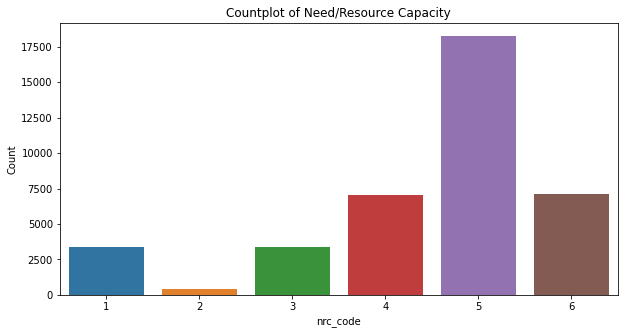

In [25]:
# distribution of Need/Resouce Capacity

# Set the figure size
plt.figure(figsize=(10, 5))

# Create the countplot
sns.countplot(data=data, x='nrc_code') 

# Set labels and title
plt.xlabel('nrc_code')
plt.ylabel('Count')
plt.title('Countplot of Need/Resource Capacity')

# Display the plot
plt.show()

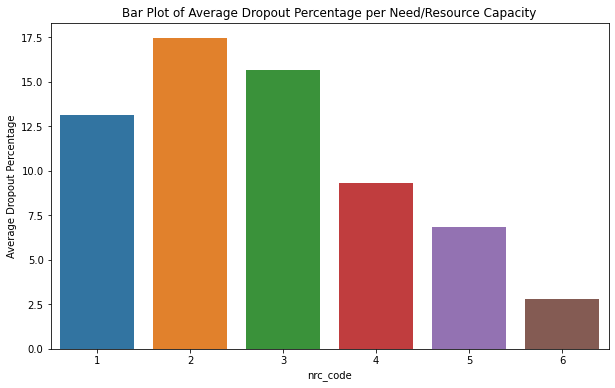

In [25]:
# Calculate mean 'dropout_pct' per 'nrc_code'
mean_dropout_pct = data.groupby('nrc_code')['dropout_pct'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_dropout_pct.index, y=mean_dropout_pct.values)

# Set labels and title
plt.xlabel('nrc_code')
plt.ylabel('Average Dropout Percentage')
plt.title('Bar Plot of Average Dropout Percentage per Need/Resource Capacity')

# Display the plot
plt.show()

In [27]:
dataset['nrc_desc'].unique()

array(['Urban-Suburban High Needs', 'Average Needs', 'Low Needs',
       'Rural High Needs', 'Buffalo  Rochester  Yonkers  Syracuse', 'NYC'],
      dtype=object)

'Urban-Suburban High Needs', 'Average Needs', 'Low Needs'  are the categories of Need/Resource capacity attribute that have the highest average percentage of regent diploma. In other words, student dropout percentages are higher in those categories. 

---

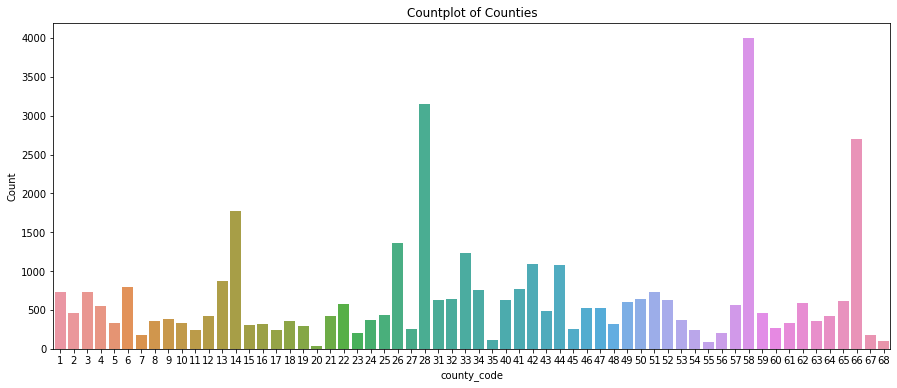

In [28]:
# distribution of Counties

# Set the figure size
plt.figure(figsize=(15, 6))

# Create the countplot
sns.countplot(data=data, x='county_code') 

# Set labels and title
plt.xlabel('county_code')
plt.ylabel('Count')
plt.title('Countplot of Counties')

# Display the plot
plt.show()

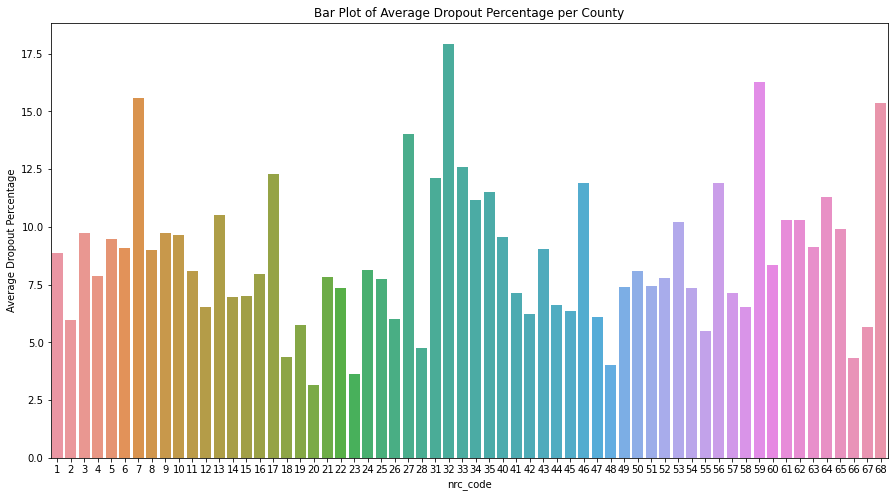

In [26]:
# Calculate mean 'dropout_pct' per 'county_code'
mean_dropout_pct_county = data.groupby('county_code')['dropout_pct'].mean()

# Create a bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x=mean_dropout_pct_county.index, y=mean_dropout_pct_county.values)

# Set labels and title
plt.xlabel('county_code')
plt.ylabel('Average Dropout Percentage')
plt.title('Bar Plot of Average Dropout Percentage per County')

# Display the plot
plt.show()

In [27]:
county_codes = [7, 27, 32, 59, 68]

# Filter the DataFrame based on the county codes
filtered_counties = dataset[dataset['county_code'].isin(county_codes)]

# Get the unique county names from the filtered DataFrame
filtered_counties['county_name'].unique()

array(['CHEMUNG', 'MONTGOMERY', 'BRONX', 'SULLIVAN', 'YATES'],
      dtype=object)

- County attribute has a higher cardinality with plenty of unique values. However, 8 of them is correlated with the reg_cnt.

- 'CHEMUNG', 'MONTGOMERY', 'BRONX', 'SULLIVAN', and 'YATES' are the counties with the highest average percentage of dropout.

---

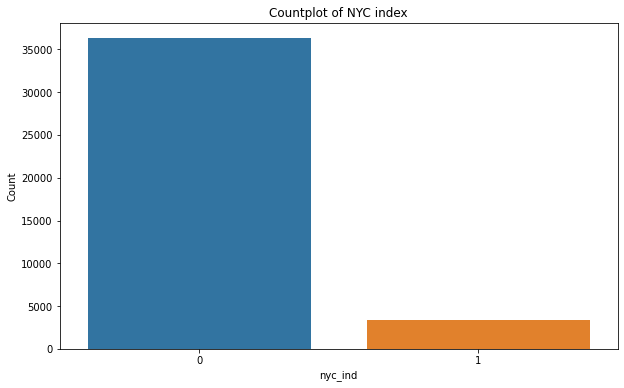

In [28]:
# distribution of NYC index

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the countplot
sns.countplot(data=data, x='nyc_ind') 

# Set labels and title
plt.xlabel('nyc_ind')
plt.ylabel('Count')
plt.title('Countplot of NYC index')

# Display the plot
plt.show()

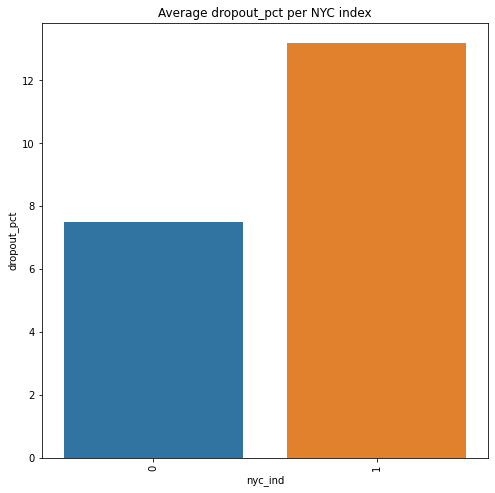

In [29]:
# distribution of NYC index

# Calculate average dropout percantage per subgroup_code
dropout_pct_nyc = data.groupby('nyc_ind')['dropout_pct'].mean().reset_index()

# Plot the average dropout percentage per subgroup_code
plt.figure(figsize=(8, 8))
sns.barplot(x='nyc_ind', y='dropout_pct', data=dropout_pct_nyc)
plt.title('Average dropout_pct per NYC index')
plt.xticks(rotation=90)
plt.show()

Even though most of the districts in the dataset is located out of NYC, when it comes to average dropout percentage, NYC districts dramatically increase and exceed the non-NYC districts. In other words, NYC schools has higher percent of dropouts.

---

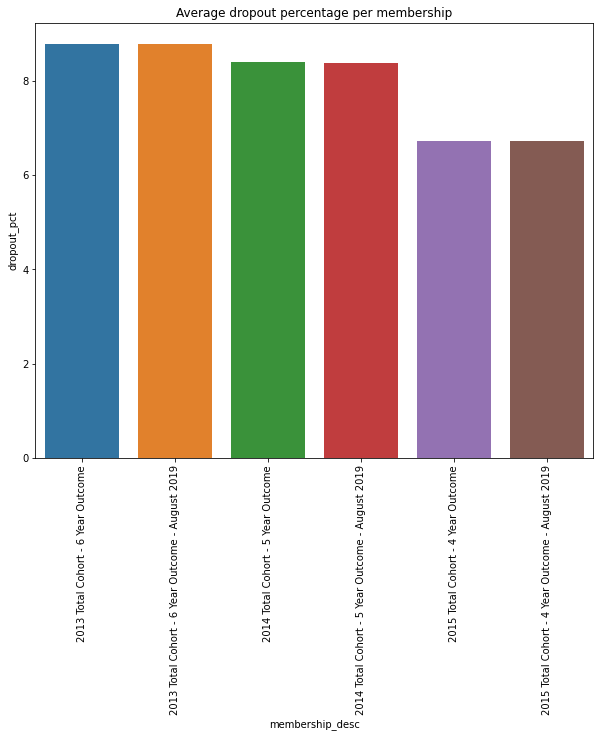

In [30]:
# distribution of membership

# Calculate acerage dropout percantage per membership_desc
dropout_per_membership = data.groupby('membership_desc')['dropout_pct'].mean().reset_index()
# Plot the total dropout per subgroup_code
plt.figure(figsize=(10, 8))
sns.barplot(x='membership_desc', y='dropout_pct', data=dropout_per_membership)
plt.title('Average dropout percentage per membership')
plt.xticks(rotation=90)
plt.show()

The average dropout per 'membership_desc' decreases as the numbe of year for outcome decreases. It is obvious that this decrease is because of the change in the number of years, as more number of years means there will be more student enrolled, thus more stundent will dropout. We think this column does not contain neither useful nor interesting information regarding the target variable, and we will leave it out from the model we will build.

---

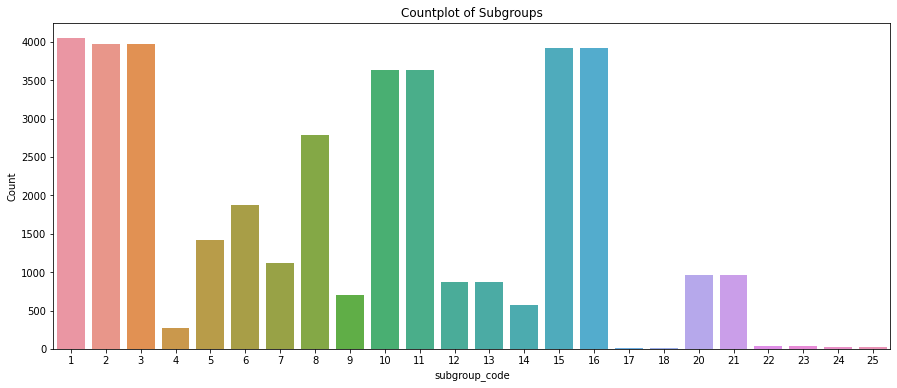

In [35]:
# distribution of Counties

# Set the figure size
plt.figure(figsize=(15, 6))

# Create the countplot
sns.countplot(data=data, x='subgroup_code') 

# Set labels and title
plt.xlabel('subgroup_code')
plt.ylabel('Count')
plt.title('Countplot of Subgroups')

# Display the plot
plt.show()

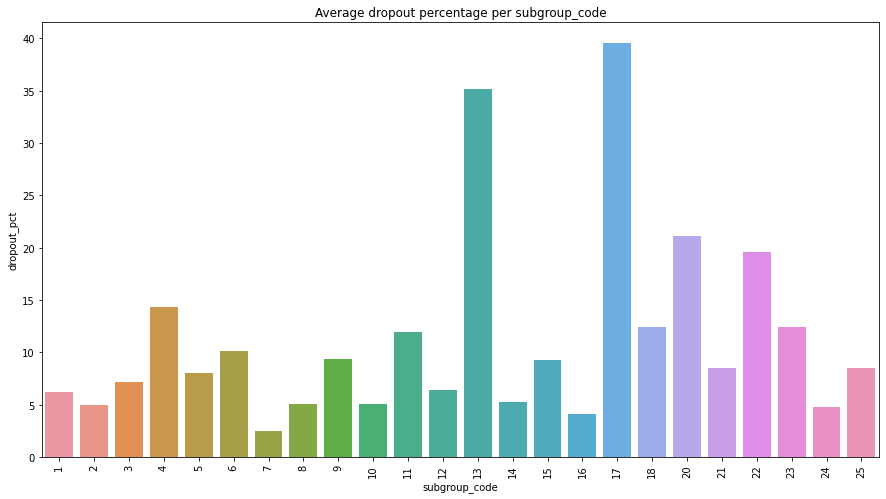

In [35]:
# distribution of subgroup code

# Calculate average dropout_pct per subgroup_code
dropout_per_subgroup = data.groupby('subgroup_code')['dropout_pct'].mean().reset_index()

# Plot the average dropout_pct per subgroup_code
plt.figure(figsize=(15, 8))
sns.barplot(x='subgroup_code', y='dropout_pct', data=dropout_per_subgroup)
plt.title('Average dropout percentage per subgroup_code')
plt.xticks(rotation=90)
plt.show()

In [34]:
subgroup_codes = [13, 17, 20, 22]

# Filter the DataFrame based on the county codes
filtered_subgroups = dataset[dataset['subgroup_code'].isin(subgroup_codes)]

# Get the unique county names from the filtered DataFrame
filtered_subgroups['subgroup_name'].unique()

array(['English Language Learner', 'Migrant', 'Homeless',
       'In Foster Care'], dtype=object)

- 'Migrant' category has the highest average score of dropout students (~40%). It should be because of adaptation and socio-economic conditions the studens from a migrant background encounter.

- 'English Language Learner' has the second highest percentage. There might be coincidence between 'migrant' and 'English Learners'. However, we lack the relevant information to conclude this.

- 'Homeless' and 'In Foster Care' are the other categories with higher percentage of dropout. This is understandable.

### Distribution of data in numerical variables

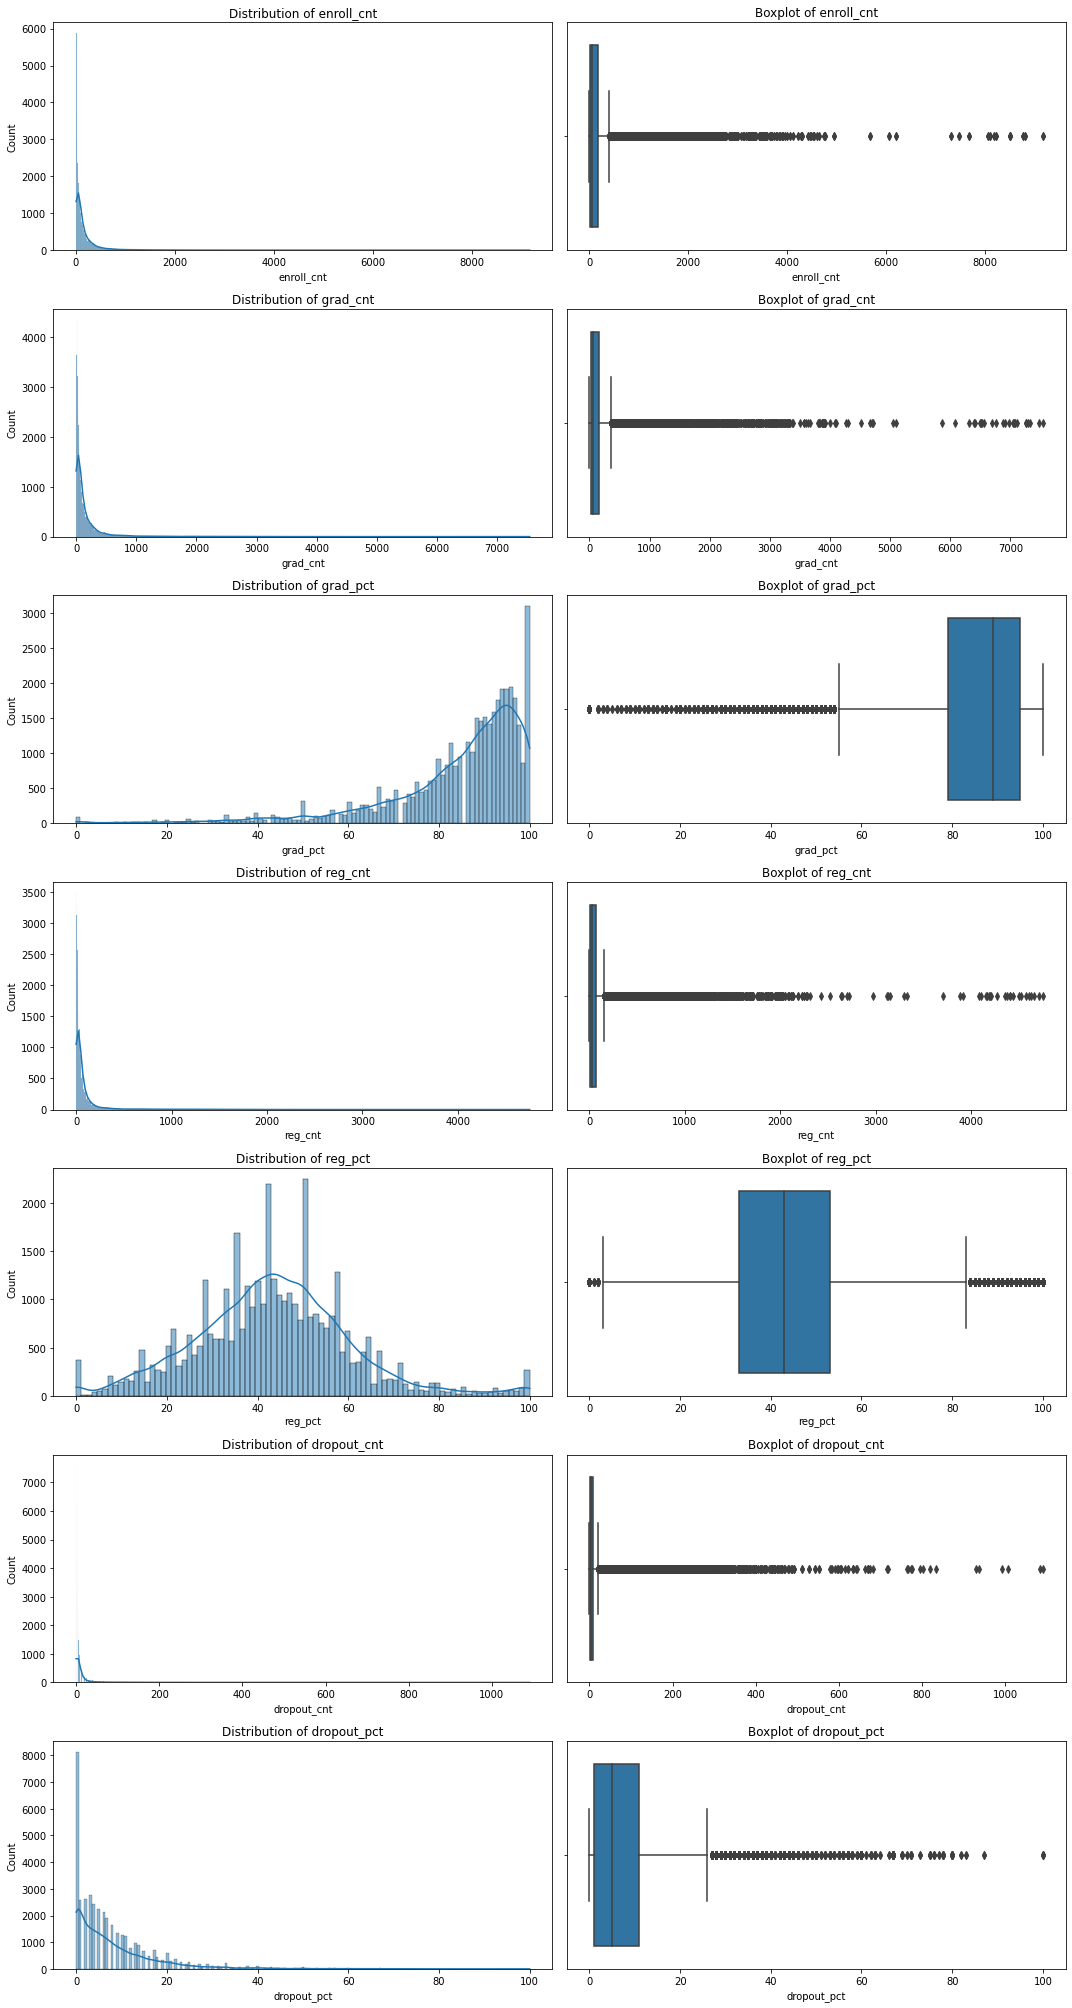

In [38]:
# Set up the matplotlib figure
f, axes = plt.subplots(len(num_cols.columns), 2, figsize=(15, 4 * len(num_cols.columns)))
for i, col in enumerate(num_cols.columns):
    try:
        # Plot a histogram with Kernel Density Estimate
        sns.histplot(data=num_cols, x=col, kde=True, ax=axes[i, 0])
        axes[i, 0].set_title(f'Distribution of {col}')
        # Plot a boxplot to identify outliers
        sns.boxplot(x=num_cols[col], ax=axes[i, 1])
        axes[i, 1].set_title(f'Boxplot of {col}')
    except Exception as e:
        print(f'Issue with column: {col}. Error: {e}')
plt.tight_layout()

- Except 'reg_pct', the numerical attributes are quite skewed, mosth of them lean toward right. Thanks to decision tree/random forest models, which are usually not affected by outliers, we might not need to create a model based on a transformed data for outlier handling. However, in order to get the best model performance, we will transform to limit the number of outliers in them using a proper method.


- In the right-skewed attributes ('enroll_cnt', 'grad_cnt', 'reg_cnt', 'dropout_cnt', and 'dropout_pct'), values are cumulated over smaller values close to 0.


- The only variable with a normal distribution is 'reg_pct'. And the only variable with a left-skewed ditribution is 'grad_pct'.


- Attributes storing percentage data (pct) have less skewness compared to the attributes storing the count data of the same variable. We can conclude that, since percentage data is a kind of normalized version of the count data, we can further benefit from data transformation to have a more Gaussian distribution.

---

Text(0.5, 1.0, 'Correlation Matrix of Numerical Variables')

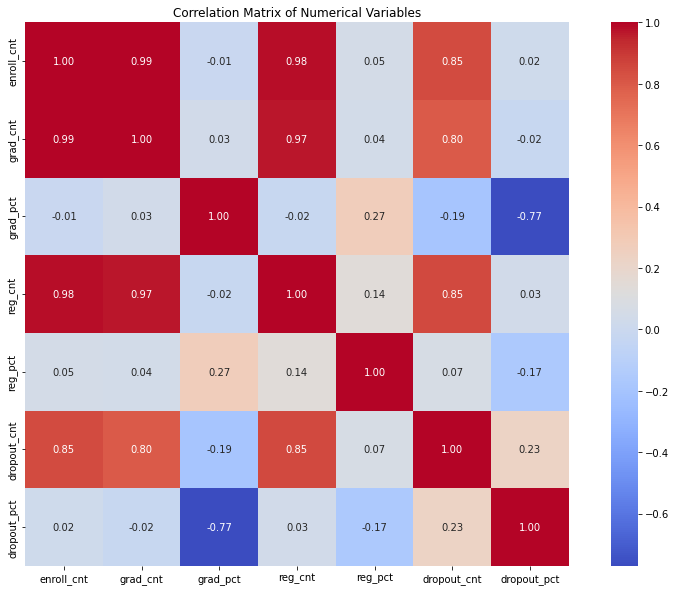

In [39]:
# Plot heatmap of correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(num_cols.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Numerical Variables')
plt.title('Correlation Matrix of Numerical Variables')

- 'enroll_cnt' and 'grad_cnt' are very highly correlated. We can conclude that they are collinear to each other. They both are also highly correlated with 'reg_cnt', which contains the same data with the 'reg_pct'. 


- On the other side, it is confusing that 'grad_pct', which is the percentage form of 'grad_cnt', is not highly correlated to 'reg_pct'. This is parellel to all the percentage data, in which there is not any collinearity.


- 'dropout_pct' is inversely correlated with 'grad_pct'. In other words, as the percentage of graduation increases, likelihood of dropout decreases.


- The correlational analysis futher ensures us to remove the numerical variables storing the count data (grad_cnt, reg_cnt, dropout_cnt) and keep the percentage version of the same data. The only exception is 'enroll_cnt', which neither has a percentage version in the dataset nor a too high correlation with dropout_pct.

---

# Data Preparation

In this section we will select the variables that we have found out useful during EDA, and transform the data to make the data ready for model building. We will create two different datasets for different models. In the first dataset, we will only remove the attributes that do not contain useful information regarding the target variable. The second dataset will be similar to the first one but only include selected categorical variables. We will begin with extracting the target variable from 'reg_pct' attribute.

In [40]:
def categorize_dropout_pct(dropout_pct, median):
    '''The function takes dropout_pct column,
    and convert it a catgorical variable
    consisting of low, medium and high categories '''
    
    if dropout_pct < 0.5 * median:
        return 'low'
    elif 0.5 * median < dropout_pct <= 1.5 * median:
        return 'medium'
    else:
        return 'high'

# Compute the median
median_dropout_pct = data['dropout_pct'].median()

# Apply the function to the 'reg_pct' column to create the 'reg_pct_level' column
data['dropout_class'] = data['dropout_pct'].apply(categorize_dropout_pct, args=(median_dropout_pct,))


# Display the first few rows of the DataFrame
data.head()


,aggregation_name,nrc_code,county_code,nyc_ind,membership_desc,subgroup_code,enroll_cnt,grad_cnt,grad_pct,reg_cnt,reg_pct,dropout_cnt,dropout_pct,dropout_class
0,ALBANY CITY SCHOOL DISTRICT,3,1,0,2013 Total Cohort - 6 Year Outcome,1,658,464,71.0,310,47.0,148,22.0,high
1,ALBANY CITY SCHOOL DISTRICT,3,1,0,2013 Total Cohort - 6 Year Outcome,2,324,246,76.0,169,52.0,65,20.0,high
2,ALBANY CITY SCHOOL DISTRICT,3,1,0,2013 Total Cohort - 6 Year Outcome,3,334,218,65.0,141,42.0,83,25.0,high
4,ALBANY CITY SCHOOL DISTRICT,3,1,0,2013 Total Cohort - 6 Year Outcome,5,367,248,68.0,183,50.0,91,25.0,high
5,ALBANY CITY SCHOOL DISTRICT,3,1,0,2013 Total Cohort - 6 Year Outcome,6,98,58,59.0,40,41.0,28,29.0,high


In [41]:
# number of observation of the target variable
data['dropout_class'].count()

39674

In [42]:
# check if there is any missing value in the target variable
data['dropout_class'].isnull().sum()

0

The number of observation and missing values in the target variable shows that extracted target variable is calculated for every observation.

In [43]:
# Define the columns to drop
columns_to_drop = ['aggregation_name','membership_desc', 'grad_cnt', 'dropout_cnt', 'dropout_pct', 'reg_cnt']

# Drop the columns
data = data.drop(columns=columns_to_drop)

# display
data.head()

,nrc_code,county_code,nyc_ind,subgroup_code,enroll_cnt,grad_pct,reg_pct,dropout_class
0,3,1,0,1,658,71.0,47.0,high
1,3,1,0,2,324,76.0,52.0,high
2,3,1,0,3,334,65.0,42.0,high
4,3,1,0,5,367,68.0,50.0,high
5,3,1,0,6,98,59.0,41.0,high


In [44]:
# Define the categorical variables
categorical_vars = data[['nrc_code', 'county_code', 'nyc_ind', 'subgroup_code']]

# Create dummy variables
data_dummy = pd.get_dummies(categorical_vars, columns=['nrc_code', 'county_code', 'subgroup_code'])

# Print the first few rows of the encoded DataFrame
data_dummy.head()

,nyc_ind,nrc_code_1,nrc_code_2,nrc_code_3,nrc_code_4,nrc_code_5,nrc_code_6,county_code_1,county_code_2,county_code_3,...,subgroup_code_15,subgroup_code_16,subgroup_code_17,subgroup_code_18,subgroup_code_20,subgroup_code_21,subgroup_code_22,subgroup_code_23,subgroup_code_24,subgroup_code_25
0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# ordinal encoding for the target variable

from sklearn.preprocessing import OrdinalEncoder

# Define the ordinal categories
categories = [['low', 'medium', 'high']]

# Initialize the encoder
encoder = OrdinalEncoder(categories=categories)

# Fit and transform the target variable
data['dropout_encoded'] = encoder.fit_transform(data[['dropout_class']])

# display
data.head()

,nrc_code,county_code,nyc_ind,subgroup_code,enroll_cnt,grad_pct,reg_pct,dropout_class,dropout_encoded
0,3,1,0,1,658,71.0,47.0,high,2.0
1,3,1,0,2,324,76.0,52.0,high,2.0
2,3,1,0,3,334,65.0,42.0,high,2.0
4,3,1,0,5,367,68.0,50.0,high,2.0
5,3,1,0,6,98,59.0,41.0,high,2.0


In [47]:
# define numerical variables
numerical_vars = data[['enroll_cnt', 'grad_pct', 'reg_pct']]

# combine dummay variables and numerical variables
data_final = pd.concat([data_dummy, numerical_vars], axis=1)

# add the ordinal encoded target variable
data_final['dropout_encoded'] = data['dropout_encoded']
                         
# display
data_final

,nyc_ind,nrc_code_1,nrc_code_2,nrc_code_3,nrc_code_4,nrc_code_5,nrc_code_6,county_code_1,county_code_2,county_code_3,...,subgroup_code_20,subgroup_code_21,subgroup_code_22,subgroup_code_23,subgroup_code_24,subgroup_code_25,enroll_cnt,grad_pct,reg_pct,dropout_encoded
0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,658,71.0,47.0,2.0
1,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,324,76.0,52.0,2.0
2,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,334,65.0,42.0,2.0
4,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,367,68.0,50.0,2.0
5,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,98,59.0,41.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73138,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,36,69.0,56.0,2.0
73142,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,48,90.0,67.0,2.0
73143,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,13,15.0,15.0,2.0
73145,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,33,70.0,61.0,2.0


We have removed 'aggregation_name' and 'membership_desc' categorical attributes since they do not contain important information for the target variable. We have also dropped 'reg_cnt' and 'grad_cnt', and kept 'reg_pct' and 'grad_pct' instead. We have also not included 'dropout_cnt' and 'droput_pct' after extracting the new target variable. Finally, we have converted categorical variables into dummy variables and the number of the dimension in the data has gone up to 97, which decision trees/random forest algorithms can handle.

We will transform the numerical variables. The method we will apply is Yeo-Johnson, which is applicable to columns that contain negative, positive, and zero values. Since we have zero values in out dataset, it is applicable to the numerical values that are in non-Gaussian shape.

In [48]:
# import the library for transformation
from sklearn.preprocessing import PowerTransformer


# Create the transformer
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson')

# List of columns to transform
columns_to_transform = ['enroll_cnt', 'grad_pct', 'reg_pct']

# Apply the transformation to each column
for col in columns_to_transform:
    # Reshape the column to fit the transformer
    data_array = data_final[col].values.reshape(-1, 1)
    # Transform the column
    transformed_data = yeo_johnson_transformer.fit_transform(data_array)
    # Replace the original column with the transformed column
    data_final[col] = transformed_data

data_final.head()

,nyc_ind,nrc_code_1,nrc_code_2,nrc_code_3,nrc_code_4,nrc_code_5,nrc_code_6,county_code_1,county_code_2,county_code_3,...,subgroup_code_20,subgroup_code_21,subgroup_code_22,subgroup_code_23,subgroup_code_24,subgroup_code_25,enroll_cnt,grad_pct,reg_pct,dropout_encoded
0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1.556674,-1.203165,0.240588,2.0
1,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1.117188,-0.905171,0.523544,2.0
2,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1.136630,-1.494472,-0.046961,2.0
4,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1.196556,-1.357296,0.410878,2.0
5,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0.309499,-1.722803,-0.105074,2.0


---

# Prepped Data Review


In this section, we will visualize the target variable over the explanatory variables. We will also plot the distribution of prepared data.

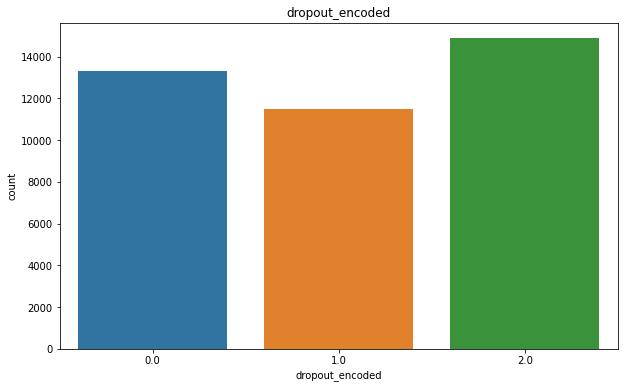

In [50]:
# Create a count plot for 'reg_pct_level'
plt.figure(figsize=(10, 6))
sns.countplot(x='dropout_encoded', data=data_final)
plt.title('dropout_encoded')
plt.show()

Each category has a relatively balanced distribution. We will not resample the data.

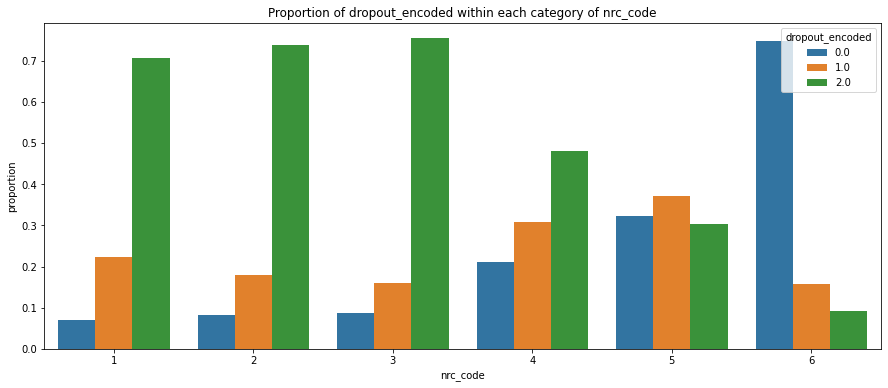

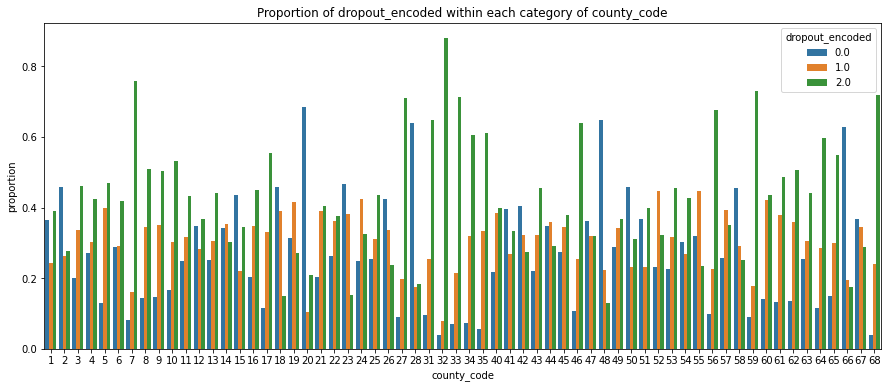

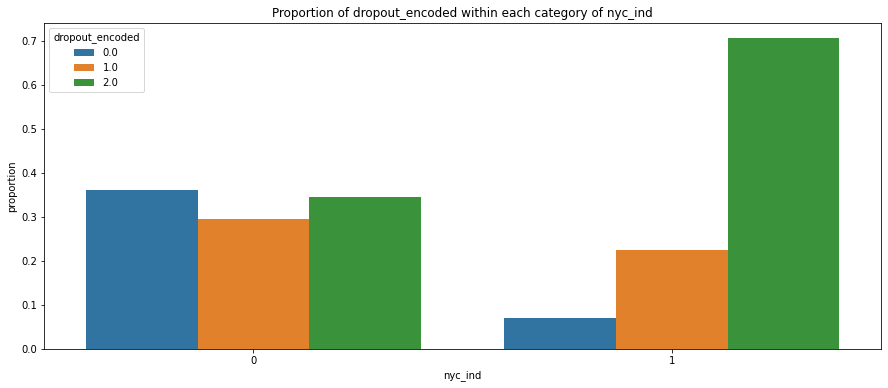

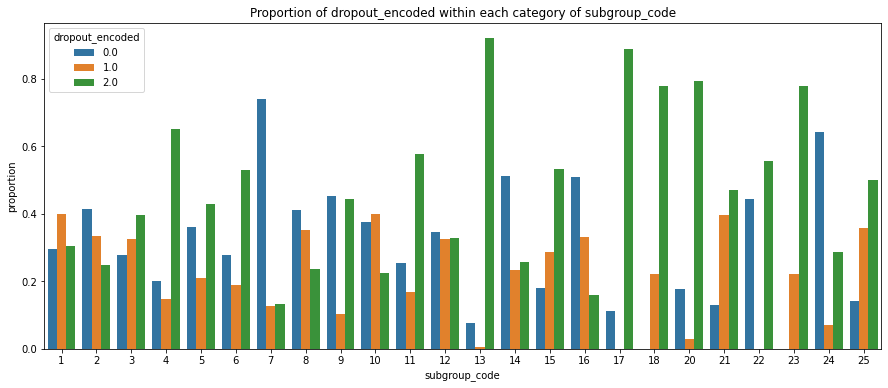

In [51]:
# List of categorical variables
categorical_vars = ['nrc_code', 'county_code', 'nyc_ind', 'subgroup_code']

# Loop over categorical variables and create a plot for each
for var in categorical_vars:
    # Group by the categorical variable and 'reg_pct_level', calculate the size of each group, 
    # then divide by the total size of the groups for the categorical variable to get the proportion
    proportion = (data.groupby([var, 'dropout_encoded']).size() / data.groupby(var).size()).reset_index(name='proportion')
    
    # Create a bar plot of the proportions
    plt.figure(figsize=(15, 6))
    sns.barplot(x=var, y='proportion', hue='dropout_encoded', data=proportion)
    plt.title(f'Proportion of dropout_encoded within each category of {var}')
    plt.show()


- Previously in EDA, we had discovered that NRC categories 1,2,3,4 had higher dropout percentages. NRC distribution over categorized dropout also supports this finding.


- Parallel to the EDA finding, counties with codes 7, 27, 32, 59, and 68 have the highest dropouts rates.


- Dropouts with 'high' category is the overwhelming majority in NYC schools that further support the previous finding.


- Parallel to the previous finding, subgroups 13, 17, 20, 22 have the highest dropouts.

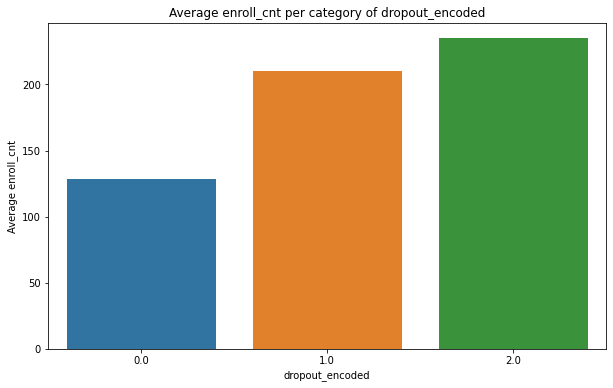

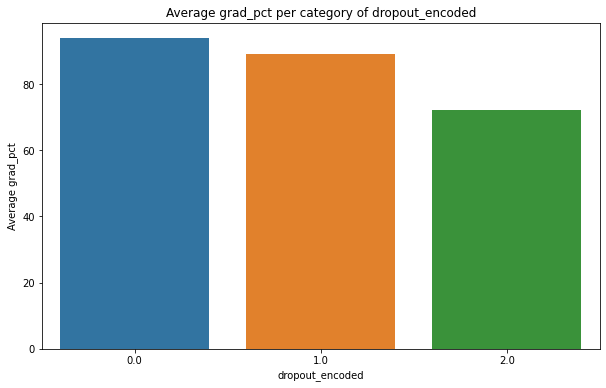

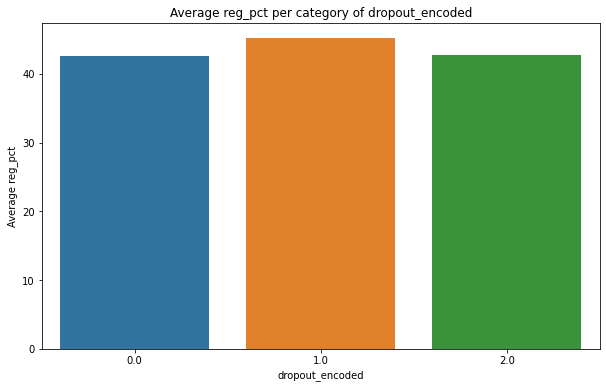

In [90]:
# List of numerical variables
numerical_vars = ['enroll_cnt', 'grad_pct', 'reg_pct']

# Loop over numerical variables and create a plot for each
for var in numerical_vars:
    # Group by 'reg_pct_level' and calculate the mean of the variable
    mean_values = data.groupby('dropout_encoded')[var].mean()
    
    # Create a bar plot of the mean values
    plt.figure(figsize=(10, 6))
    sns.barplot(x=mean_values.index, y=mean_values.values)
    plt.title(f'Average {var} per category of dropout_encoded')
    plt.ylabel(f'Average {var}')
    plt.xlabel('dropout_encoded')
    plt.show()


- As the number of enrollment increases average dropout percentage inceases as well.


- As the number of graduation increases, average dropout decreases.


- Regent diploma seems not have a significant impact on the classes of dropout.

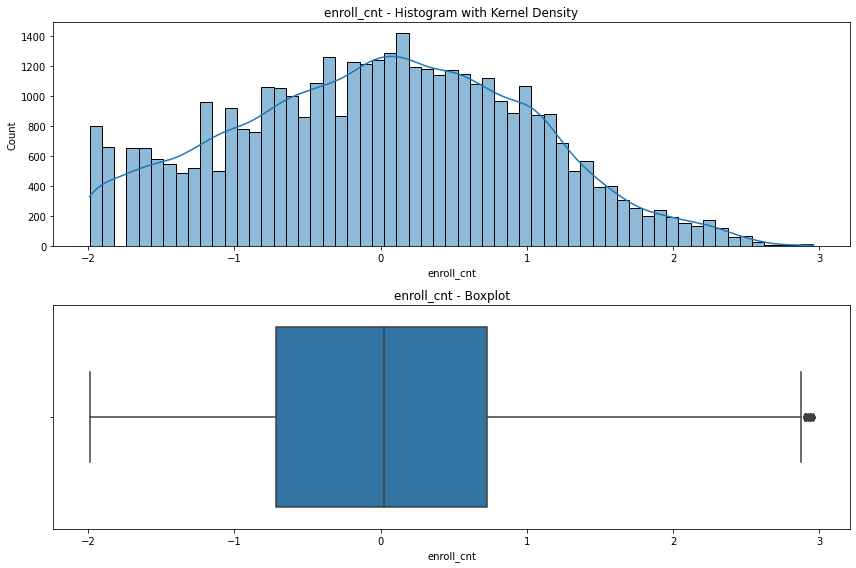

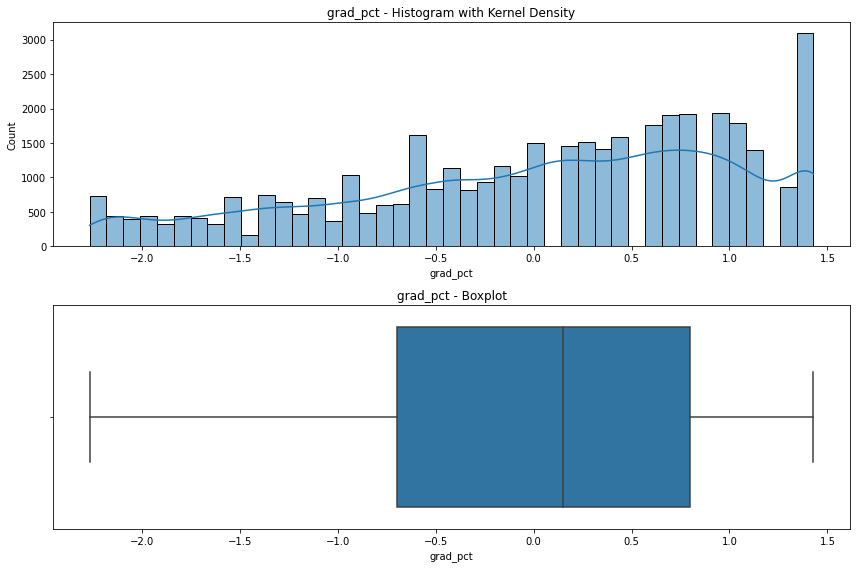

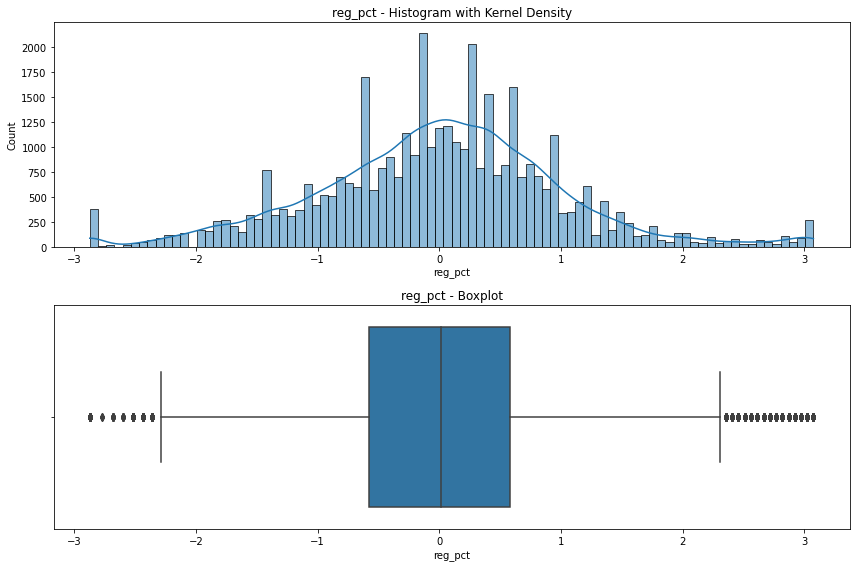

In [100]:
# Importing necessary libraries
import seaborn as sns

# List of columns
cols = ['enroll_cnt', 'grad_pct', 'reg_pct']

# Loop over columns and create a histogram with kernel density and boxplot for each
for col in cols:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8))
    
    # Plot histogram with kernel density on the first subplot
    sns.histplot(data_final[col], kde=True, ax=ax1)
    ax1.set_title(f'{col} - Histogram with Kernel Density')
    
    # Plot boxplot on the second subplot
    sns.boxplot(x=data_final[col], ax=ax2)
    ax2.set_title(f'{col} - Boxplot')
    
    # Improve layout
    plt.tight_layout()
    plt.show()


It seems that data transformation worked relatively well. We have now more Gaussian distribution of the numerical values.

# Model Building


In this part, we will train one model from each of decision tree, random forest, gradient boosting classifier, stichastic gradient classifier, and XG Boost classifier. We will then compare their performances and select the best performing model and implement it on the testing data. Since there are several parameters for the algorithms we will use, and there is no established rules for choosing the best ones, we will discover the optimum parameters with experimenting on different values using gridy algorithm. Since we have a limited computing power, we will not be able to give a large ranges for the parameter values.

In [61]:
# import model building and performance metrics libraries

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier



In [60]:
!pip install xgboost

from xgboost import XGBClassifier

## Model 1: Decision-Tree on Imbalanced Data

In [55]:
# Split the data into features and target variable
X = data_final.drop(columns='dropout_encoded')
y = data_final['dropout_encoded']

# Split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Define the hyperparameters and the values to try
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': range(1, 10)
}

# Initialize the grid search
grid_search = GridSearchCV(clf, parameters, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train1, y_train1)

# Print the best parameters
print("Best parameters: ", grid_search.best_params_)

# Predict the target variable for the testing set
y_pred_train1 = grid_search.predict(X_train1)

# Compute the performance metrics
cm = confusion_matrix(y_train1, y_pred_train1)
accuracy = accuracy_score(y_train1, y_pred_train1)
report = classification_report(y_train1, y_pred_train1)

# Calculate the null error rate
null_error_rate = 1 - y_train1.value_counts().max() / len(y_train1)


# Print the performance metrics
print("Confusion Matrix: \n", cm)
print("Accuracy: ", accuracy)
print(report)
print("Null Error Rate: ", null_error_rate)

Best parameters:  {'criterion': 'gini', 'max_depth': 9, 'splitter': 'best'}
Confusion Matrix: 
 [[ 7469  2276   898]
 [  717  6607  1863]
 [  169  1261 10479]]
Accuracy:  0.7736538643309493
              precision    recall  f1-score   support

         0.0       0.89      0.70      0.79     10643
         1.0       0.65      0.72      0.68      9187
         2.0       0.79      0.88      0.83     11909

    accuracy                           0.77     31739
   macro avg       0.78      0.77      0.77     31739
weighted avg       0.79      0.77      0.77     31739

Null Error Rate:  0.6247833895207788


## Model 2: Random Forest Model

In [57]:
# Initialize the random forest classifier
clf = RandomForestClassifier(random_state=42)

# Define the hyperparameters and the values to try
parameters = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 10),
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the grid search
grid_search = GridSearchCV(clf, parameters, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train1, y_train1)

# Print the best parameters
print("Best parameters: ", grid_search.best_params_)

# Predict the target variable for the training set
y_pred_train4 = grid_search.predict(X_train1)

# Compute the performance metrics
cm = confusion_matrix(y_train1, y_pred_train4)
accuracy = accuracy_score(y_train1, y_pred_train4)
report = classification_report(y_train1, y_pred_train4)

# Calculate the null error rate
null_error_rate = 1 - y_train1.value_counts().max() / len(y_train1)

# Print the performance metrics
print("Confusion Matrix: \n", cm)
print("Accuracy: ", accuracy)
print(report)
print("Null Error Rate: ", null_error_rate)


Best parameters:  {'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto', 'n_estimators': 200}
Confusion Matrix: 
 [[ 7791  1657  1195]
 [ 1272  5283  2632]
 [  239   739 10931]]
Accuracy:  0.7563250259932575
              precision    recall  f1-score   support

         0.0       0.84      0.73      0.78     10643
         1.0       0.69      0.58      0.63      9187
         2.0       0.74      0.92      0.82     11909

    accuracy                           0.76     31739
   macro avg       0.76      0.74      0.74     31739
weighted avg       0.76      0.76      0.75     31739

Null Error Rate:  0.6247833895207788


## Model 3: Gradient Boosting Classifier

In [81]:
from sklearn.metrics import classification_report, accuracy_score

# Specify the hyperparameters and their possible values
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [2, 4, 6],
    'subsample': [0.4, 0.7, 1.0]
}

# Initialize the classifier
gb = GradientBoostingClassifier(random_state=0)

# Initialize GridSearchCV
grid_search2 = GridSearchCV(estimator=gb, param_grid=param_grid, cv=3, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search2.fit(X_train1, y_train1)

# Print the best parameters
print('Best parameters found: ', grid_search2.best_params_)

# Predict on the training set
y_pred1 = grid_search2.predict(X_train1)

# Calculate and print the performance metrics
print('Classification Report: \n', classification_report(y_train1, y_pred1))
print('Accuracy Score: ', accuracy_score(y_train1, y_pred1))


Best parameters found:  {'learning_rate': 1.0, 'max_depth': 6, 'n_estimators': 200}
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10643
         1.0       1.00      1.00      1.00      9187
         2.0       1.00      1.00      1.00     11909

    accuracy                           1.00     31739
   macro avg       1.00      1.00      1.00     31739
weighted avg       1.00      1.00      1.00     31739

Accuracy Score:  0.9990862976149217


- It seems the Gradient Boosting Classifer overfits the testing data by predicting all classes correctly. This might be due to too detailed parameter value options. To fix this, we will train the model using different parameter options.

In [91]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Specify the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 150],  # reduce the number of trees
    'max_depth': [2, 3, 4],  # reduce the depth of trees
    'subsample': [0.6, 0.8, 1.0],  # increase the subsampling rate
    'learning_rate': [0.1, 0.3, 0.5]  # increase the learning rate values
}

# Initialize the classifier
gb = GradientBoostingClassifier(random_state=0)

# Initialize GridSearchCV
grid_search2 = GridSearchCV(estimator=gb, param_grid=param_grid, cv=3, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search2.fit(X_train1, y_train1)

# Print the best parameters
print('Best parameters found: ', grid_search2.best_params_)

# Predict on the training set
y_pred1 = grid_search2.predict(X_train1)

# Calculate and print the performance metrics
print('Classification Report: \n', classification_report(y_train1, y_pred1))
print('Accuracy Score: ', accuracy_score(y_train1, y_pred1))


Best parameters found:  {'learning_rate': 0.5, 'max_depth': 4, 'n_estimators': 150, 'subsample': 0.8}
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.92      0.87      0.90     10643
         1.0       0.83      0.85      0.84      9187
         2.0       0.90      0.93      0.92     11909

    accuracy                           0.89     31739
   macro avg       0.89      0.88      0.88     31739
weighted avg       0.89      0.89      0.89     31739

Accuracy Score:  0.888055704338511


This time, model worked better compared to the first model.

# Model 4: Stochastic Gradient Classifier

In [99]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Specify the hyperparameters and their possible values
param_grid = {
    'max_iter': [1000, 1500, 2000],
    'tol': [1e-3, 1e-4, 1e-5],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'eta0': [0.1, 0.01, 0.001]
}

# Initialize the classifier
sgd = SGDClassifier(random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=sgd, param_grid=param_grid, cv=10, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train1, y_train1)

# Print the best parameters
print('Best parameters found: ', grid_search.best_params_)

# Predict on the training set
y_pred3 = grid_search.predict(X_train1)

# Calculate and print the performance metrics
print('Classification Report: \n', classification_report(y_train1, y_pred3))
print('Accuracy Score: ', accuracy_score(y_train1, y_pred3))


Best parameters found:  {'eta0': 0.1, 'max_iter': 1000, 'penalty': 'l2', 'tol': 0.001}
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.66      0.86      0.75     10643
         1.0       0.83      0.09      0.17      9187
         2.0       0.67      0.95      0.79     11909

    accuracy                           0.67     31739
   macro avg       0.72      0.64      0.57     31739
weighted avg       0.71      0.67      0.60     31739

Accuracy Score:  0.6728630391631747


# Model 5: XGBoost Classifier

In [77]:
# Specify the hyperparameters and their possible values
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [2, 4, 6],
    'gamma': [0, 0.1, 0.2]
}

# Initialize the classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train1, y_train1)

# Print the best parameters
print('Best parameters found: ', grid_search.best_params_)

# Predict on the training set
y_pred4 = grid_search.predict(X_train1)

# Calculate and print the performance metrics
print('Classification Report: \n', classification_report(y_train1, y_pred4))
print('Accuracy Score: ', accuracy_score(y_train1, y_pred4))


C:\Users\volka\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\volka\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\volka\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Best parameters found:  {'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 300}
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.95      0.89      0.92     10643
         1.0       0.86      0.87      0.87      9187
         2.0       0.91      0.95      0.93     11909

    accuracy                           0.91     31739
   macro avg       0.91      0.90      0.91     31739
weighted avg       0.91      0.91      0.91     31739

Accuracy Score:  0.9079366079586628


---

# Model Preference

In [97]:
# Create a dictionary with model names as keys and metrics as values
model_performance = {
    'Model': ['Model 1 (DT)', 'Model 2(RF)', 'Model 3(GrB)', 'Model 4(SGrB)', 'Model 5(XGB)'],
    'Accuracy': [0.77, 0.76, 0.89, 0.67, 0.91],
    'Precision': [0.78, 0.76, 0.89, 0.72, 0.91],
    'Recall': [0.77,  0.74, 0.88, 0.64, 0.90],
    'F1-Score': [0.77, 0.74, 0.88, 0.57, 0.91]
}

# Convert the dictionary to a DataFrame
model_performance = pd.DataFrame(model_performance)

# Print the DataFrame
model_performance

,Model,Accuracy,Precision,Recall,F1-Score
0,Model 1 (DT),0.77,0.78,0.77,0.77
1,Model 2(RF),0.76,0.76,0.74,0.74
2,Model 3(GrB),0.89,0.89,0.88,0.88
3,Model 4(SGrB),0.67,0.72,0.64,0.57
4,Model 5(XGB),0.91,0.91,0.90,0.91


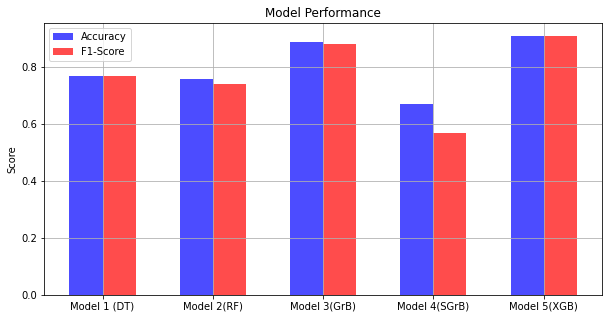

In [98]:
import matplotlib.pyplot as plt

# Setting the positions and width for the bars
pos = list(range(len(model_performance['Accuracy']))) 
width = 0.3 

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with Accuracy data,
plt.bar(pos, 
        model_performance['Accuracy'], 
        width, 
        alpha=0.7, 
        color='b', 
        label=model_performance['Model'][0]) 

# Create a bar with F1-Score data,
plt.bar([p + width for p in pos], 
        model_performance['F1-Score'],
        width, 
        alpha=0.7, 
        color='r', 
        label=model_performance['Model'][1]) 

# Setting the y axis label
ax.set_ylabel('Score')

# Setting the chart's title
ax.set_title('Model Performance')

# Setting the position of the x ticks
ax.set_xticks([p + 0.5 * width for p in pos])

# Setting the labels for the x ticks
ax.set_xticklabels(model_performance['Model'])

# Adding the legend and showing the plot
plt.legend(['Accuracy', 'F1-Score'], loc='upper left')
plt.grid()
plt.show()


- For comparison, we will use accuracy and f1 scores. The reason for this is twofold. First, the target value is almost equally balanced and accuracy works well in this setting. Second, since f1 score is harmonic mean of precision and recall, we can use it for the purpose of comparison.


- As the model performance dataframe shows, we could improve the model performances in the Model 3 and Model 5. It is not surprise that those model with the best performance metrics are ensemble models. 


- However, it is surprising that the Model 4, Stochastic Gradient Classifier is the least performing model. We were not expecting this reduction from an ensemble model. Though we think that it might be due to the insufficient randomization or the selection of parameter options, the performance did not change when we tried different cross-validation and paramater values.


- Model 5 (XGBoost) has the best score with 0.91 accuracy and f1 and it is followed by the Model 3 (gradient boosting) with 0.88 accuracy and F1 scores. This means that the model can differentiate the different categories with over 90% success in all the metrics. We can choose the Model 5 as the best performing model not only it has the highest score in all metrics, but also computational efficiency it showed compared to the Model 3, which is the worst among all the models. 
  


- Since the default weak learner of the gradient boosting models we used above is Decision Tree algorithm, we did not change the parameter regarding the weak learner.


- The null error for each model is 0.62. The dataset is relatively well balanced.


## Model Testing

In [106]:
# Initialize the classifier with the best parameters
xgb_best = XGBClassifier(use_label_encoder=False, 
                         eval_metric='logloss', 
                         random_state=0, 
                         gamma=0.1, 
                         learning_rate=0.2, 
                         max_depth=6, 
                         n_estimators=300)

# Fit the model to the test data
xgb_best.fit(X_test1, y_test1)  # Replace X_test and y_test with your actual testing data and labels

# Predict on the test set
y_pred_test = xgb_best.predict(X_test1)  # Replace X_test with your actual testing data

# Calculate and print the performance metrics
print('Classification Report: \n', classification_report(y_test1, y_pred_test))  # Replace y_test with your actual test labels


C:\Users\volka\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Classification Report: 
               precision    recall  f1-score   support

         0.0       0.99      0.95      0.97      2672
         1.0       0.95      0.96      0.96      2292
         2.0       0.97      0.99      0.98      2971

    accuracy                           0.97      7935
   macro avg       0.97      0.97      0.97      7935
weighted avg       0.97      0.97      0.97      7935



The selected model (XGBoost) is performed very well on the testing data. There is also 5% increase on the performance of the model in each metric compared to the model performed on the trainign data. We can conclude that the model can confidently predict the correct category for the given observations.

# Conclusion



Over the course of the project, we've conducted extensive exploratory data analysis, data preprocessing, feature engineering, and machine learning model building. During preprocessing, we managed missing values and outliers, and transformed features using various methods.

In addressing the classification problem of predicting the 'dropout_pct' category, we created and tested a series of models, including a Decision Tree, a Random Forest, a Gradient Boosting Classifier, a Stochastic Gradient Descent Classifier, and an XGBoost Classifier.

Our results demonstrated the effectiveness of gradient descent-based models compared to other types of models. The XGBoost model outperformed the others, achieving the highest accuracy and F1-score.

These findings underscore the power of machine learning in predicting student dropout categories in New York State school districts. Future research could explore other machine learning algorithms, feature selection techniques, and advanced methods for handling imbalanced data to further improve model performance.